# **APA - Correlation Analysis**
# DATA 3300


## Name: Israel Bell


## Q1

First, load the required libraries then import the dataset. Produce a heading of the data and then consider which variables need to be removed prior to running a correlation analysis. Subset the dataframe to include only those variables that can be included, then generate histograms for each of those variables.


In [5]:
# replace with code to load pandas, matplotlib.pyplot, and numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats #this library will be used to transform variables

In [6]:
# replace with code to import dataset

df = pd.read_excel("/content/faculty (1).xlsx")

# replace with code to preview dataset (heading)

df.head()

,facid,n1,n2,n3,n4,m1,m2,m3,m4,s1,s2,s3,gender,tenure-track,courserate,gpa,lrnoutcome
0,1,6,6,5,5,2,2,4,2,2,2,2,female,y,4.654,2.865,5.5
1,2,4,5,3,3,4,4,3,4,2,3,2,female,n,3.598,2.399,5.5
2,3,4,4,2,3,3,3,3,2,1,2,2,female,y,3.355,2.269,3.0
3,4,4,4,4,4,2,2,2,2,2,3,3,male,n,4.234,2.863,4.2
4,5,6,7,4,5,3,3,3,2,2,1,2,male,y,4.875,3.650,5.3


Explain which columns need to be dropped (and why) prior to a correlation analysis.

Drop any categorical data as it won't be useful to categorize because it is already defined. Two of the categories Gender and tenure track; we drop because you can't run Pearson correlation with categorical data. As for FacID we drop because it has no impact on our calculation as it is an arbrituary number to identify the faculty.

In [7]:
df = df.dropna()# replace with code to drop rows with missing data
df = df.drop(['facid', 'gender', 'tenure-track'], axis=1) # removes categorical variables and primary key
df.head()# replace with code to select only columns that can be included in a correlation analysis OR drop out columns that cannot be included


,n1,n2,n3,n4,m1,m2,m3,m4,s1,s2,s3,courserate,gpa,lrnoutcome
0,6,6,5,5,2,2,4,2,2,2,2,4.654,2.865,5.5
1,4,5,3,3,4,4,3,4,2,3,2,3.598,2.399,5.5
2,4,4,2,3,3,3,3,2,1,2,2,3.355,2.269,3.0
3,4,4,4,4,2,2,2,2,2,3,3,4.234,2.863,4.2
4,6,7,4,5,3,3,3,2,2,1,2,4.875,3.650,5.3


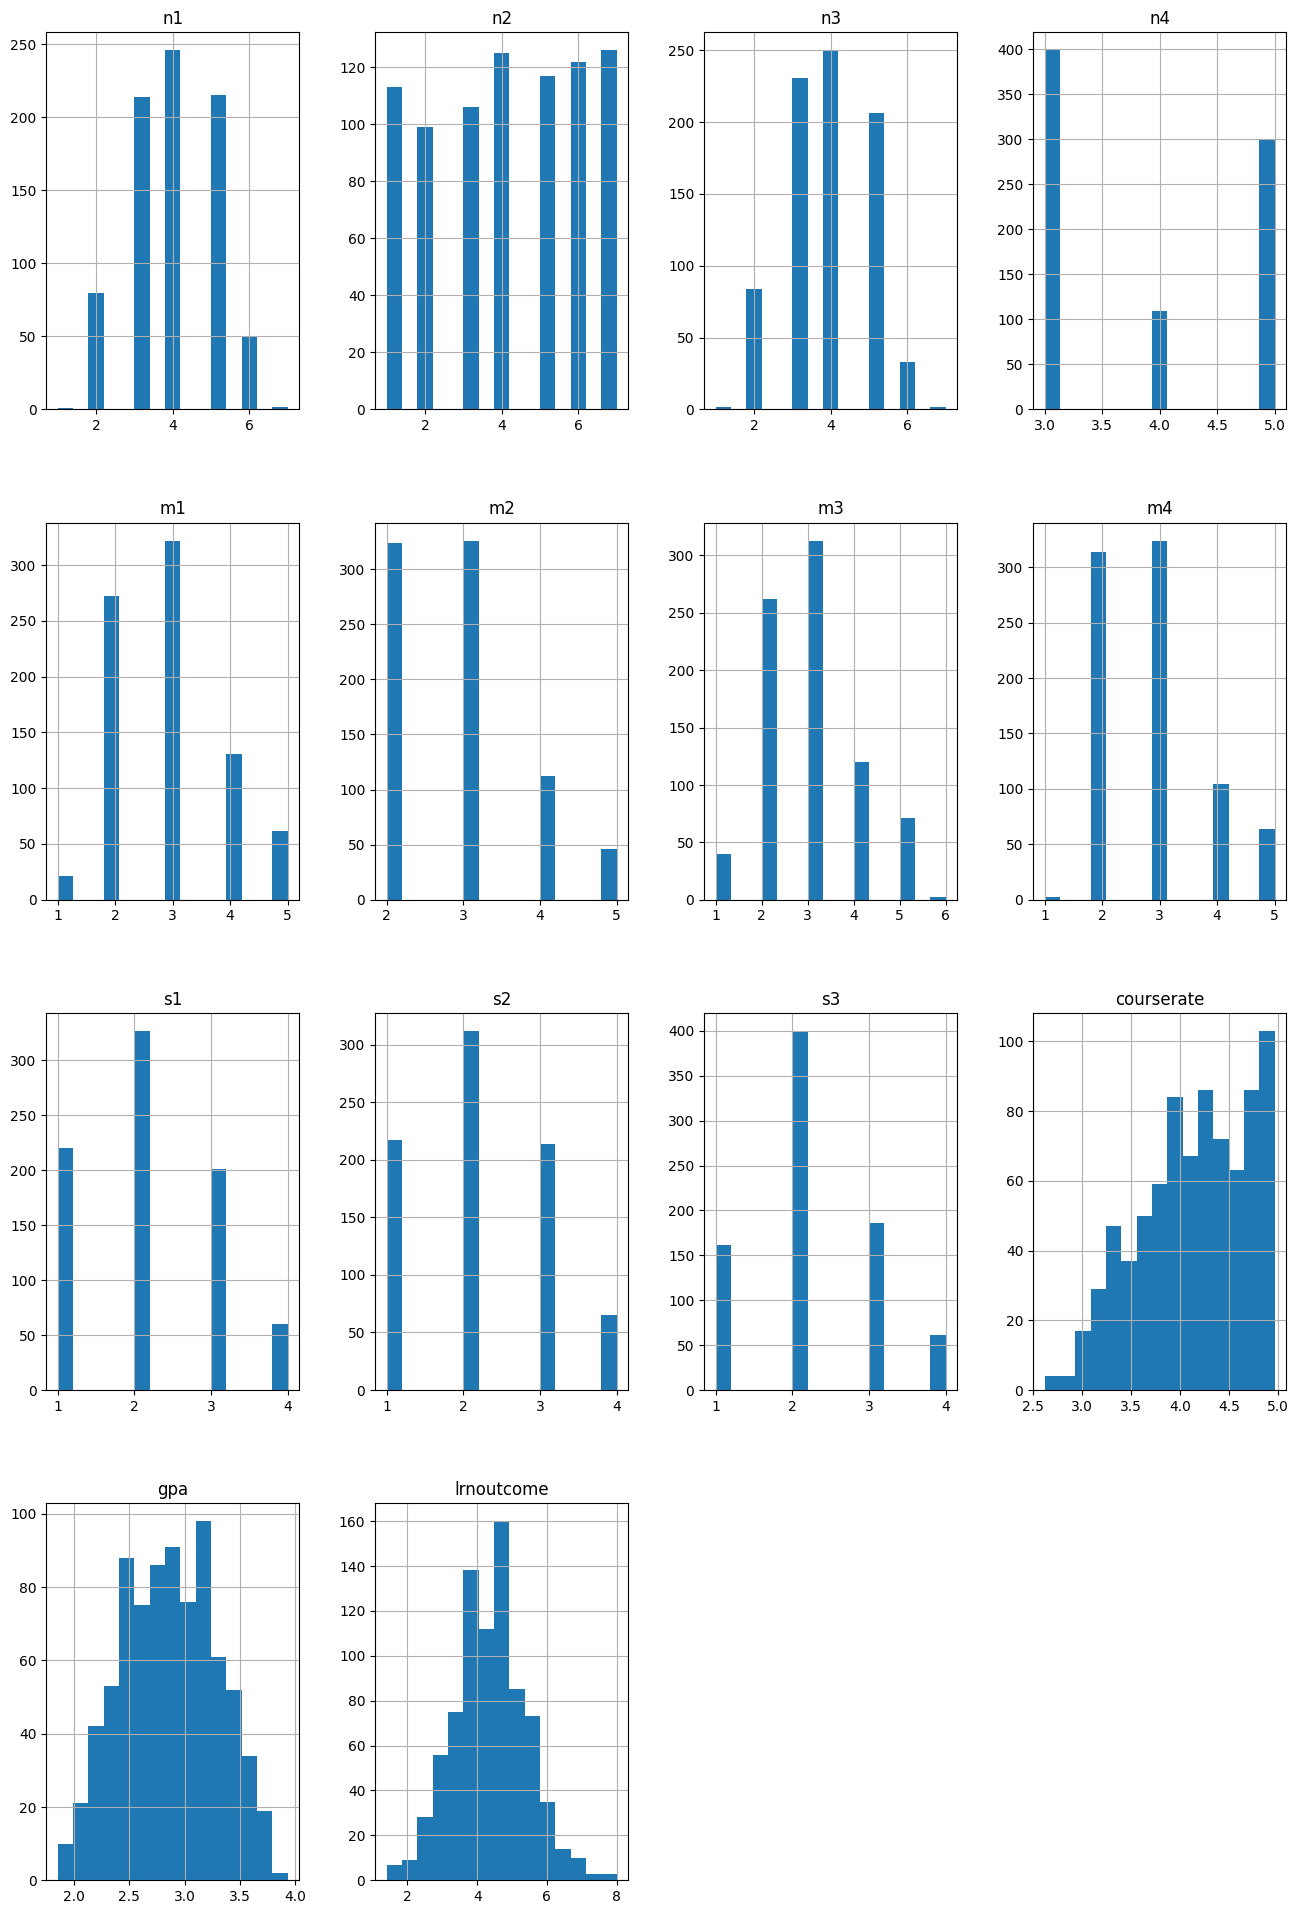

In [8]:
# replace with code to generate histograms on remaining 14 variables/columns. Hint: Change the layout values to accomodate 14 histograms.
df.hist(layout=(4,4), figsize=(16,24), bins=15) #generates histograms of remaining numerical vars or variables
plt.show()

List the variables that are not normally distributed: N2, N4, M2, M4, S2, CourseRate

How will you address these non-normally distributed vars?

Use mathmatical techniques such as log and sqrt to normalize these values.

# Q2

**Generate correlation matrix colormap table, making sure to include all necessary steps:**

## A

**Transform skewed variables using a Box-Cox transformation, including `n4`, `courserate`, `m2`, and `m4`.**

In [9]:
# replace with code to create new transformed variables for n4, courserate, m2, and m4. Use the Box-Cox method.
df['n2_bc'] = stats.boxcox(df['n2'])[0]
df['n4_bc'] = stats.boxcox(df['n4'])[0]
df['m2_bc'] = stats.boxcox(df['m2'])[0]
df['courserate_bc'] = stats.boxcox(df['courserate'])[0]
df['m4_bc'] = stats.boxcox(df['m4'])[0]
#preview the headers
df.head()

,n1,n2,n3,n4,m1,m2,m3,m4,s1,s2,s3,courserate,gpa,lrnoutcome,n2_bc,n4_bc,m2_bc,courserate_bc,m4_bc
0,6,6,5,5,2,2,4,2,2,2,2,4.654,2.865,5.5,4.031002,0.823316,0.543575,14.818360,0.599089
1,4,5,3,3,4,4,3,4,2,3,2,3.598,2.399,5.5,3.308701,0.681229,0.870784,7.965376,1.043299
2,4,4,2,3,3,3,3,2,1,2,2,3.355,2.269,3.0,2.558060,0.681229,0.754749,6.708581,0.599089
3,4,4,4,4,2,2,2,2,2,3,3,4.234,2.863,4.2,2.558060,0.769623,0.543575,11.815349,0.599089
4,6,7,4,5,3,3,3,2,2,1,2,4.875,3.650,5.3,4.730555,0.823316,0.754749,16.550293,0.599089


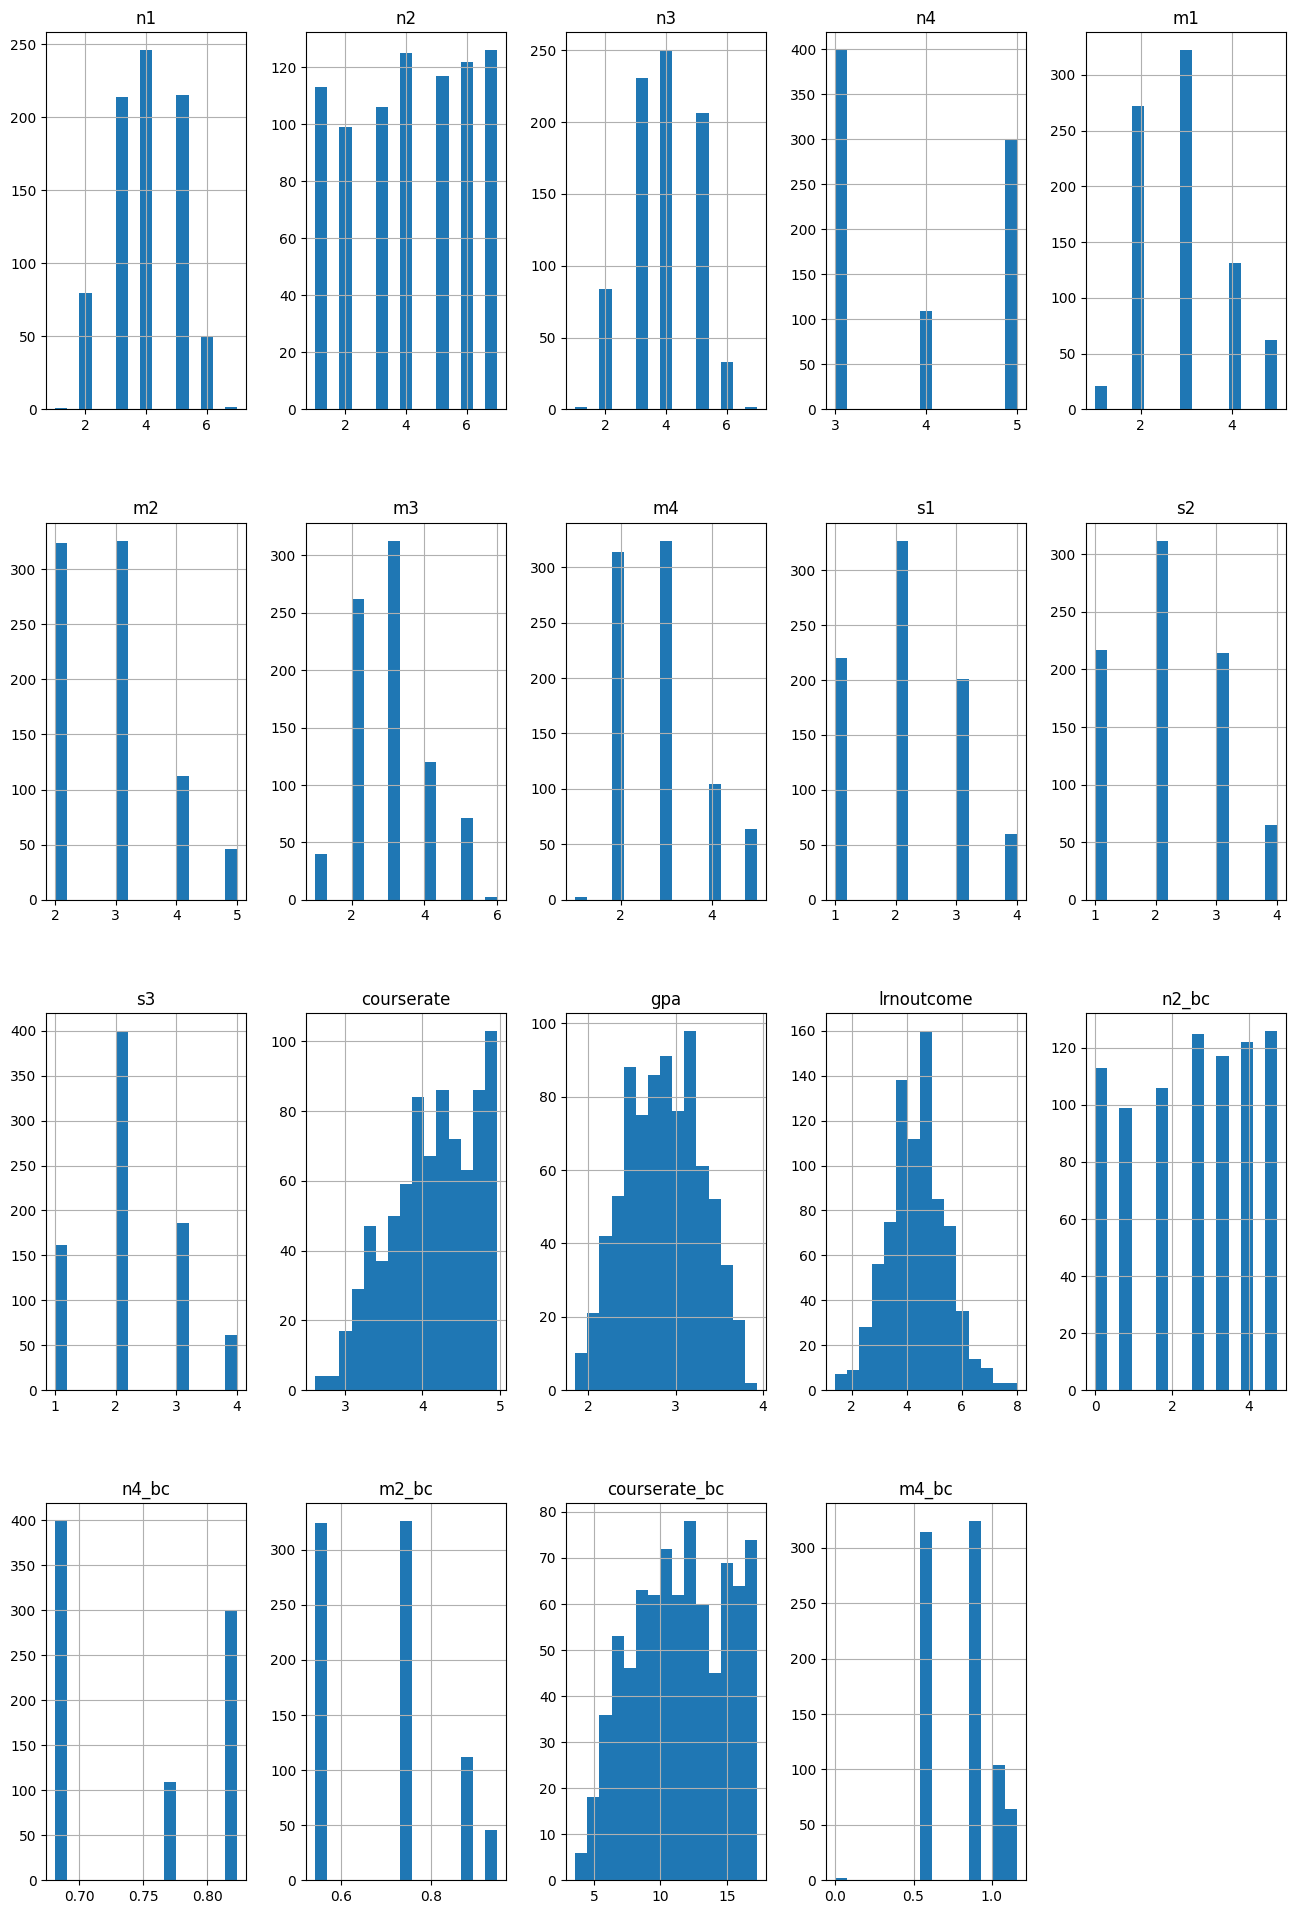

In [10]:
# replace with code to view histograms of transformed variables (it's okay to include the other variables as well, in which case use layout=(5,4))
df.hist(layout=(4,5), figsize=(16,24), bins=15) #generates histograms of remaining numerical vars or variables
plt.show()


**Are there any variables with distributions that cannot be made roughly normal? How could this impact the validity of the correlation analysis?**

None of the variables had significant transformations and remained not normally distributed. COurserate had slight change, so I can include it, but with caution.In general these results are an issue becuase an assumption of correlation analysis is that the data is normally distributed and that would violate the assumption.

**Note: Not all variables will be normally distributed after transformation. For the scope of this assignment, discuss which are or are not normally distributed and which did or did not improve. Then we'll keep all the transformed variables in our correlation analysis for now!**



## B

**Create a new data object subset (e.g., call it df_T) that contains your new transformed variables, and the original normally distributed variables.**

**Then, run the correlation matrix and display it in a color mapped table.**


In [11]:
# replace with code to create new data subset object that drops n4, courserate, m2, and m4 (keep all transformed vars for now)
df_T = df.drop(['n2', 'n4', 'm2', 'm4', 'courserate'], axis=1)
#preview the new data object subset
df.head()

,n1,n2,n3,n4,m1,m2,m3,m4,s1,s2,s3,courserate,gpa,lrnoutcome,n2_bc,n4_bc,m2_bc,courserate_bc,m4_bc
0,6,6,5,5,2,2,4,2,2,2,2,4.654,2.865,5.5,4.031002,0.823316,0.543575,14.818360,0.599089
1,4,5,3,3,4,4,3,4,2,3,2,3.598,2.399,5.5,3.308701,0.681229,0.870784,7.965376,1.043299
2,4,4,2,3,3,3,3,2,1,2,2,3.355,2.269,3.0,2.558060,0.681229,0.754749,6.708581,0.599089
3,4,4,4,4,2,2,2,2,2,3,3,4.234,2.863,4.2,2.558060,0.769623,0.543575,11.815349,0.599089
4,6,7,4,5,3,3,3,2,2,1,2,4.875,3.650,5.3,4.730555,0.823316,0.754749,16.550293,0.599089


In [12]:
# replace with code to create correlation matrix

cor_matrix = df_T.corr()

# replace with code to create color map table (cool-warm to show positive and negative correlations)

cor_matrix.style.background_gradient(cmap='seismic', axis=None, vmin=-1, vmax=1)

,n1,n3,m1,m3,s1,s2,s3,gpa,lrnoutcome,n2_bc,n4_bc,m2_bc,courserate_bc,m4_bc
n1,1.000000,0.593086,-0.052312,-0.046698,0.142333,0.175569,0.164980,0.378938,-0.141134,-0.025913,0.756801,-0.016960,0.433378,-0.053495
n3,0.593086,1.000000,-0.082005,-0.133956,0.117596,0.190751,0.145797,0.351759,-0.188219,-0.017563,0.748173,-0.072726,0.454429,-0.050730
m1,-0.052312,-0.082005,1.000000,0.482770,0.013620,-0.035312,0.010487,-0.165664,0.090698,-0.047378,-0.085604,0.469094,-0.114718,0.513999
m3,-0.046698,-0.133956,0.482770,1.000000,0.005768,-0.051190,-0.010966,-0.138520,0.055793,-0.030556,-0.076121,0.498956,-0.063808,0.491933
s1,0.142333,0.117596,0.013620,0.005768,1.000000,0.386782,0.412702,0.057388,-0.046934,-0.047969,0.211036,0.019938,-0.119162,-0.032552
s2,0.175569,0.190751,-0.035312,-0.051190,0.386782,1.000000,0.425613,0.118516,-0.108051,0.007188,0.264442,0.008583,-0.085054,0.002899
s3,0.164980,0.145797,0.010487,-0.010966,0.412702,0.425613,1.000000,0.091962,-0.123091,-0.018764,0.232208,0.018713,-0.083928,0.021291
gpa,0.378938,0.351759,-0.165664,-0.138520,0.057388,0.118516,0.091962,1.000000,-0.095224,-0.059472,0.449893,-0.141674,0.597946,-0.160386
lrnoutcome,-0.141134,-0.188219,0.090698,0.055793,-0.046934,-0.108051,-0.123091,-0.095224,1.000000,0.016882,-0.215014,0.064299,0.092923,0.061891
n2_bc,-0.025913,-0.017563,-0.047378,-0.030556,-0.047969,0.007188,-0.018764,-0.059472,0.016882,1.000000,-0.030275,0.014164,-0.025859,0.013456


## C

**Based on your correlation analysis, what are the *three strongest positive* correlations? Next identify the *three strongest negative* correlations in the dataset. Provide both the item pairs as well as their correlation coefficient.**



**3 strongest positive**
* n4_bc, n1: 0.76
* n4_bc, n3: 0.75
* courserate_bc, gpa: 0.60

**3 strongest negative**
* n4_bc, lrnoutcome: 0.22
* lrnoutcome, n3: 0.19
* gpa, m1: 0.17

## D
**What is the *third* highest $R^2$ value for any variable pair in the analysis?
What does this $R^2$ value tell us about the relationship between the two variables?**


 courserate and gpa -> r = 0.60, the $R^2$ tells us that the variation from one variable is directly related to the variation of the opposite variable. In this case the two variables would be course rate and gpa.


In [13]:
# replace with code to calculate R^2 from r value

0.60 ** 2

0.36

$R^2$ = 0.36

## E
**What is convergent validity and when does it matter?**



The degree to which its reasonable to say that multiple items are measuring the same idea. It is crucial for verifying the validity of new measuremening tools when attempting to obtain a specific attribute.

## F

**Assuming that an $r$ of 0.3 is required to demonstrate convergent validity, do the multiple items that make up each of the Narcissism (the *n* variables), Machiavellianism (the *m* variables), and Sociopathy (the *s* variables) measurements demonstrate convergent validity? Identify any attributes that do not converge adequately and report their $r$ values.**




n2 doesn't converge.

n2, n1: -0.03
n2, n3: -0.02
n2, n4: -0.03


n1, n3, n4, and s1, s2, s3 and , m1, m2, m3, m4 all converge and exceed the 0.3 threeshold within their respective groups.

# Q3

## A
Create three new aggregate variables by averaging the coverging *m* variables to represent Machiavellianism, converging *n* variables to represent Narcissim, and the converging *s* variables to represent Sociopathy.

Next replace *df_T* with a new subset containing only those variables you want to run in the new correlation analysis *(hint: do we need s1-s3 if we include Sociopathy?)*

**Then run a new correlation matrix and display it in a colormap table.**


In [14]:
df_T['Mach'] = df[['m1','m2_bc','m3','m4_bc']].mean(axis=1) #create Machiavellianism aggregate
df_T['Nar'] = df[['n1','n3','n4_bc']].mean(axis=1) #create Narcicissm aggregate
df_T['Socio'] = df[['s1','s2','s3']].mean(axis=1) #create Sociopathy aggregate
df_T = df_T[['gpa', 'lrnoutcome', 'courserate_bc', 'Mach', 'Nar', 'Socio']] #subset to only include necessary variables in correlation matrix
df_T

,gpa,lrnoutcome,courserate_bc,Mach,Nar,Socio
0,2.865,5.5,14.818360,1.785666,3.941105,2.000000
1,2.399,5.5,7.965376,2.228521,2.560410,2.333333
2,2.269,3.0,6.708581,1.838460,2.227076,1.666667
3,2.863,4.2,11.815349,1.285666,2.923208,2.666667
4,3.650,5.3,16.550293,1.838460,3.607772,1.666667
...,...,...,...,...,...,...
803,3.064,2.8,9.233432,2.088460,2.227076,1.666667
804,2.215,3.7,7.570364,1.785666,2.893743,1.666667
805,3.058,5.0,11.239745,1.535666,2.227076,1.333333
806,2.213,4.7,4.357054,1.338460,2.560410,2.666667


In [15]:
# replace with code to create correlation matrix

cor_matrix = df_T.corr()

# replace with code to create color map table (cool-warm to show positive and negative correlations)

cor_matrix.style.background_gradient(cmap='seismic', axis=None, vmin=-1, vmax=1)

,gpa,lrnoutcome,courserate_bc,Mach,Nar,Socio
gpa,1.000000,-0.095224,0.597946,-0.183845,0.412964,0.114890
lrnoutcome,-0.095224,1.000000,0.092923,0.086307,-0.186109,-0.118348
courserate_bc,0.597946,0.092923,1.000000,-0.102517,0.499348,-0.123705
Mach,-0.183845,0.086307,-0.102517,1.000000,-0.101398,-0.014940
Nar,0.412964,-0.186109,0.499348,-0.101398,1.000000,0.228953
Socio,0.114890,-0.118348,-0.123705,-0.014940,0.228953,1.000000


## B

**What are the *four* strongest correlations in the matrix? For each, give the item pair as well as the correlation coefficient.**



* Course rate, GPA: 0.60
* Narcissism, Course rate: 0.50
* Narcissism, GPA: 0.41
* Sociopathy, Narcissism: 0.23

## C

**What hypotheses might you come up with based on the correlation coefficients found in your analysis? List three, include the relevant correlation coefficient(s), and suggest why the relationship(s) noted may exist (e.g., if you were to find a strong correlation between daytime temperature and lemonade sales, you might suggest that when the weather is hot, people may become more thirsty and therefore more interested in purchasing potentially refreshing drinks).**


* Course rate, GPA: 0.60

Students who recieve better grades are more likely to give a higher course rating as they are probably left happier with their better grade.

* GPA, Macheavellianism: -0.18

Students who received lower GPAs might perceive their teachers as lacking empathy and not being sufficiently rewarding, characteristics associated with Machiavellianism. This perception could contribute to their lower academic performance. Conversely, the higher a student's GPA, the less likely they are to view their teachers through the lens of Machiavellian traits.

* Course rating, Macheavellianism: -0.10

Students who perceived their teachers as exhibiting Machiavellian traits experienced a negative correlation with their GPA. Consequently, it is logical that these students would also rate the class lower if they felt indifferent towards their teachers and received a poor grade in the class.



# Q4

**Assume that we will want to use the *Learning Outcome variable as a dependent variable in a future analysis*. Using the correlation matrix from Part 3...**

## A
**Which independent variable (IV, any variable other than Learning Outcome) has the least influence on Learning Outcome? Indicate both the variable and the coefficient or $r$-value.**



Learning Outcome, Machiavellianism: 0.086

## B

**Based on a multicollinearity threshold of $r = 0.57$, which IV pair would you want to check for multicollinearity? Indicate both the pair and the coefficient value.**

**Does it make sense that these two variables might be collinear?**


Course rate, GPA: 0.60.

Students who recieve better grades are more likely to give a higher course rating as they are probably left happier with their better grade.

**Create a visualization to illustrate evidence of this correlation.**

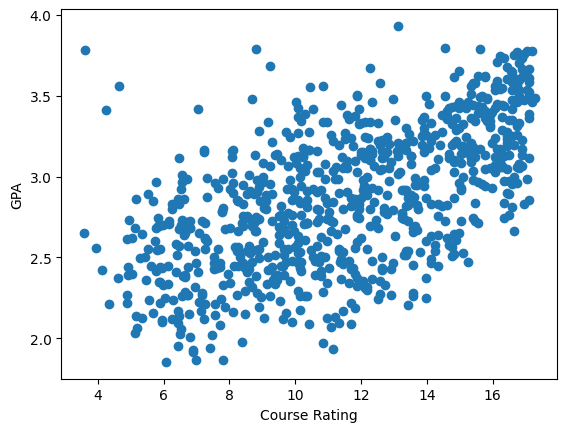

In [16]:
plt.scatter(df['courserate_bc'], df['gpa']) # replace 'Col_1' and 'Col_2' with the two variables you want to plot
plt.xlabel('Course Rating')# replace with code to add x-axis label
plt.ylabel('GPA')# replace with code to add y-axis label
plt.show()